In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect(r"c:\classroom\hr.db")

In [3]:
df = pd.read_sql("select * from employees",con)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10 non-null     int64 
 1   fullname  10 non-null     object
 2   job       10 non-null     object
 3   salary    10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
df

,id,fullname,job,salary
0,1,Stephen Walther,SPRO,1000000
1,2,Jason Hunter,DBA,1500000
2,3,Joe Stagner,SPROG,1300000
3,4,Bob Tabour,TL,2500000
4,5,Jessy Liberty,PROG,500000
5,6,James Miller,DBA,1200000
6,8,Larry Page,CEO,3000000
7,9,Jason Hunter,CTO,2000000
8,10,Bob Tabour,CFO,2000000
9,11,Rama Velpuri,,2500000


In [6]:
df['hra'] = df.salary * 0.30

In [10]:
df

,id,fullname,job,salary,hra
0,1,Scott Guthrie,TL,2000000,600000.0
1,2,Anders Helsberg,PL,3000000,900000.0
2,3,Mike,Sr. Prog,2000000,600000.0
3,4,Jack,Jr. Prog,600000,180000.0
4,5,Marshall,TL,3000000,900000.0
5,6,Karry,Tl,2500000,750000.0
6,7,Kevin,DBA,20000000,6000000.0
7,8,Roberts,,1000000,300000.0
8,9,Bob,TL,2500000,750000.0


In [11]:
df.groupby('job')['salary'].median()

job
             1000000
DBA         20000000
Jr. Prog      600000
PL           3000000
Sr. Prog     2000000
TL           2500000
Tl           2500000
Name: salary, dtype: int64

In [14]:
cur = con.cursor()
#cur.execute("drop table hra_employees")
df.to_sql("hra_employees",con, index=False)

### Excel Sheet

In [6]:
df.to_excel(r"c:\classroom\hr.xlsx", sheet_name="employees", index=False)

In [7]:
empdf = pd.read_excel(r"c:\classroom\hr.xlsx",sheet_name="employees")

In [8]:
empdf

,id,fullname,job,salary
0,1,Stephen Walther,SPRO,1000000
1,2,Jason Hunter,DBA,1500000
2,3,Joe Stagner,SPROG,1300000
3,4,Bob Tabour,TL,2500000
4,5,Jessy Liberty,PROG,500000
5,6,James Miller,DBA,1200000
6,8,Larry Page,CEO,3000000
7,9,Jason Hunter,CTO,2000000
8,10,Bob Tabour,CFO,2000000
9,11,Rama Velpuri,NaN,2500000


In [9]:
empbyjob = empdf.groupby("job")['salary'].sum()

In [10]:
empbyjob

job
CEO      3000000
CFO      2000000
CTO      2000000
DBA      2700000
PROG      500000
SPRO     1000000
SPROG    1300000
TL       2500000
Name: salary, dtype: int64

<AxesSubplot:ylabel='salary'>

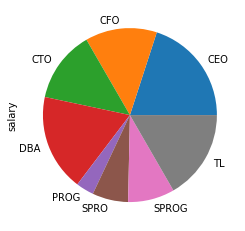

In [11]:
empbyjob.plot.pie()